In [1]:
import numpy as np
from scipy.linalg import norm, eig
import time
from geoarray import GeoArray
import scipy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import tkinter
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [2]:
images = []

Kurnool_India = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20160126\\ang20160126t055327_corr_v2m2_img')
print('1. Kurnool, India: ', Kurnool_India.shape)
images.append(Kurnool_India)

Pavicharam_India = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20180318t060114\ang20180318t060114_corr_v2s1_img')
print('2. Pavicharam, India: ', Pavicharam_India.shape)
images.append(Pavicharam_India)

SF_bay = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20181009t191224\\ang20181009t191224_corr_v2t1_img')
print('3. SF Bay, US: ', SF_bay.shape)
images.append(SF_bay)

Tulsa_OK = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20191027t160833\\ang20191027t160833_corr_v2x1_img')
print('4. Tulsa, OK: ', Tulsa_OK.shape)
images.append(Tulsa_OK)

Munich_Ger = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20180702t105516\\ang20180702t105516_corr_v2q2_img')
print('5. Munich, Germany: ', Munich_Ger.shape)
images.append(Munich_Ger)

Holstein_Switz = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20180630t083756\\ang20180630t083756_corr_v2q2_img')
print('6. Holstein, Switzerland: ', Holstein_Switz.shape)
images.append(Holstein_Switz)

MS_River = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20191027t173643\\ang20191027t173643_corr_v2x1_img')
print('7. MS River, US: ', MS_River.shape)
images.append(MS_River)

Northern_Alaska = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20170715t010040\\ang20170715t010040_corr_v2p9_img')
print('8. Northern Alaska, US: ', Northern_Alaska.shape)
images.append(Northern_Alaska)

Bear_Lake_Canada = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20190718t170508\\ang20190718t170508_rfl_v2v2_img')
print('9. Great Bear Lake Canada: ', Bear_Lake_Canada.shape)
images.append(Bear_Lake_Canada)

McKenzie_River_Canada = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20170806t191736\\ang20170806t191736_corr_v2p9_img')
print('10. McKenzie River, Canada: ', McKenzie_River_Canada.shape)
images.append(McKenzie_River_Canada)

Charleston_WV = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20191027t211458\\ang20191027t211458_corr_v2x1_img')
print('11. Charleston, West Virginia, WV: ', Charleston_WV.shape)
images.append(Charleston_WV)


Saskatchewan_Canada = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20170812t210921\\ang20170812t210921_corr_v2p9_img')
print('12. Saskatchewan, Canada: ', Saskatchewan_Canada.shape)
images.append(Saskatchewan_Canada)

Greenland_Coast = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20190826t145457\\ang20190826t145457_corr_v2w1_img')
print('13. Greenland Coast: ', Greenland_Coast.shape)
images.append(Greenland_Coast)

Neu_Ulm_Germany = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20180702t094753\\ang20180702t094753_corr_v2q2_img')
print('14. Neu Ulm, Germany: ', Neu_Ulm_Germany.shape)
images.append(Neu_Ulm_Germany)

Arctic_Ocean = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20190909t145734\\ang20190909t145734_corr_v2w1_img')
print('15. Arctic Ocean: ', Arctic_Ocean.shape)
images.append(Arctic_Ocean)

Himalayas = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20160218t083205\\ang20160218t083205_corr_v2m3_img')
print('16. Himalayas: ', Himalayas.shape)
images.append(Himalayas)

Jodhpur_India = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20180331t060955\\ang20180331t060955_corr_v2s2_img')
print('17. Jodhpur, India: ', Jodhpur_India.shape)
images.append(Jodhpur_India)

Chandranagar_India = GeoArray(r'C:\\Users\\vpatro\\Desktop\\ang20180404t063252\\ang20180404t063252_corr_v2s1_img')
print('18. Chandranagar, India: ', Chandranagar_India.shape)
images.append(Chandranagar_India)

1. Kurnool, India:  (5618, 704, 425)
2. Pavicharam, India:  (5130, 680, 425)
3. SF Bay, US:  (3998, 670, 425)
4. Tulsa, OK:  (2446, 640, 425)
5. Munich, Germany:  (1673, 649, 425)
6. Holstein, Switzerland:  (1729, 658, 425)
7. MS River, US:  (2278, 651, 425)
8. Northern Alaska, US:  (1212, 637, 425)
9. Great Bear Lake Canada:  (1950, 648, 425)
10. McKenzie River, Canada:  (4016, 648, 425)
11. Charleston, West Virginia, WV:  (2344, 649, 425)
12. Saskatchewan, Canada:  (1636, 644, 425)
13. Greenland Coast:  (7441, 692, 425)
14. Neu Ulm, Germany:  (9035, 667, 425)
15. Arctic Ocean:  (8946, 946, 425)
16. Himalayas:  (2707, 989, 425)
17. Jodhpur, India:  (11670, 728, 425)
18. Chandranagar, India:  (5375, 780, 425)


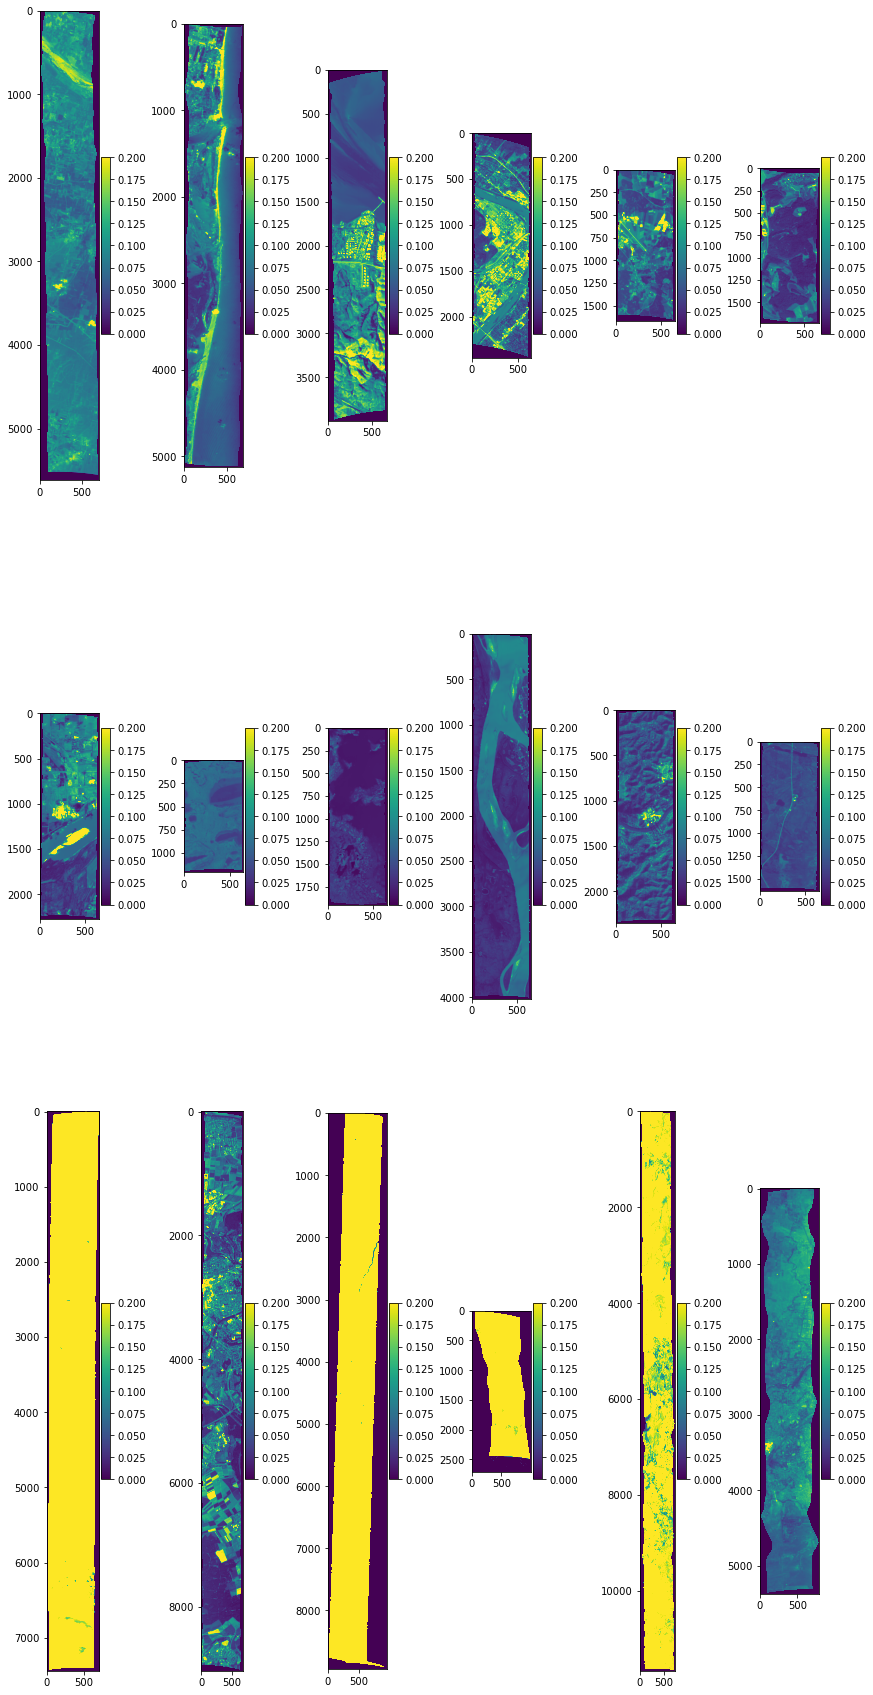

In [3]:
fig, axs = plt.subplots(nrows = 3, ncols = 6, figsize = (12,24), constrained_layout = True)
row = 0; col = 0
for i in range(len(images)):
    if col == 6:
        row+=1
        col = 0
    im = axs[row,col].imshow(images[i][:,:,50])
    plt.colorbar(im, ax = axs[row,col])
    im.set_clim(0,0.2)
    col+=1


In [4]:
len(images)

18

In [5]:
total_pixels = 0

for i in range(len(images)):
    pixel_count = images[i].shape[0]*images[i].shape[1]
    total_pixels += pixel_count
    
print(total_pixels)

57610777


In [6]:
cut_images = []

start_time = time.time()
Kurnool_India = Kurnool_India[2000:2300, 250:500, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Kurnool_India)
print('Kurnool, India: ', Kurnool_India.shape)

start_time = time.time()
Pavicharam_India = Pavicharam_India[800:1400, 100:500, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Pavicharam_India)
print('Pivacharam: ', Pavicharam_India.shape)

start_time = time.time()
SF_bay = SF_bay[1500:2300, 75:300, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(SF_bay)
print('SF Bay, USA: ', SF_bay.shape)

start_time = time.time()
Tulsa_OK = Tulsa_OK[400:800, 150:400, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Tulsa_OK)
print('Tulsa, OK, USA: ', Tulsa_OK.shape)

start_time = time.time()
Munich_Ger = Munich_Ger[1050:1250, 200:550, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Munich_Ger)
print('Munich, Germany: ', Munich_Ger.shape)

start_time = time.time()
Holstein_Switz = Holstein_Switz[1400:1600, 100:500, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Holstein_Switz)
print('Holstein, Switzerland: ', Holstein_Switz.shape)

start_time = time.time()
MS_River = MS_River[800:1700, 100:300, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(MS_River)
print('Mississippi River, USA: ', MS_River.shape)

start_time = time.time()
Northern_Alaska = Northern_Alaska[300:600, 150:450, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Northern_Alaska)
print('Northern Alaska, USA: ', Northern_Alaska.shape)

start_time = time.time()
Bear_Lake_Canada = Bear_Lake_Canada[1000:1300, 200:500, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Bear_Lake_Canada)
print('Great Bear Lake, Canada: ', Bear_Lake_Canada.shape)

start_time = time.time()
McKenzie_River_Canada = McKenzie_River_Canada[2000:2700, 150:500, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(McKenzie_River_Canada)
print('McKenzie River, Canada: ', McKenzie_River_Canada.shape)

start_time = time.time()
Charleston_WV = Charleston_WV[1100:1400, 200:500, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Charleston_WV)
print('Charleston, WV, USA: ', Charleston_WV.shape)

start_time = time.time()
Saskatchewan_Canada = Saskatchewan_Canada[600:1000, 100:400, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Saskatchewan_Canada)
print('Saskatchewan, Canada: ', Saskatchewan_Canada.shape)

start_time = time.time()
Greenland_Coast = Greenland_Coast[1600:1800, 150:350, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Greenland_Coast)
print('Greenland Coast: ', Greenland_Coast.shape)

start_time = time.time()
Neu_Ulm_Germany = Neu_Ulm_Germany[3200:3700, 50:350, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Neu_Ulm_Germany)
print('Neu Ulm, Germany: ', Neu_Ulm_Germany.shape)

start_time = time.time()
Arctic_Ocean = Arctic_Ocean[2200:2600, 500:750, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Arctic_Ocean)
print('Arctic Ocean: ', Arctic_Ocean.shape)

start_time = time.time()
Himalayas = Himalayas[1000:1300, 500:700, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Himalayas)
print('Himalayas: ', Himalayas.shape)

start_time = time.time()
Jodhpur_India = Jodhpur_India[6000:6500, 200:650, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Jodhpur_India)
print('Jodhpur, India: ', Jodhpur_India.shape)

start_time = time.time()
Chandranagar_India = Chandranagar_India[200:400, 300:600, :]
print("--- %s seconds ---" % (time.time() - start_time))
cut_images.append(Chandranagar_India)
print('Chandranagar, India: ', Chandranagar_India.shape)

# Last 3 lines - Himalayan mountains, potentially Northweast Switzerland on the German border, Ratnagiri India, Vembanadu,
# Mangalore, Kota 

--- 8.326980113983154 seconds ---
Kurnool, India:  (300, 250, 425)
--- 16.577786445617676 seconds ---
Pivacharam:  (600, 400, 425)
--- 20.392757654190063 seconds ---
SF Bay, USA:  (800, 225, 425)
--- 11.263242721557617 seconds ---
Tulsa, OK, USA:  (400, 250, 425)
--- 5.748616933822632 seconds ---
Munich, Germany:  (200, 350, 425)
--- 4.876297235488892 seconds ---
Holstein, Switzerland:  (200, 400, 425)
--- 23.20273447036743 seconds ---
Mississippi River, USA:  (900, 200, 425)
--- 8.389456987380981 seconds ---
Northern Alaska, USA:  (300, 300, 425)
--- 6.895587682723999 seconds ---
Great Bear Lake, Canada:  (300, 300, 425)
--- 16.817753076553345 seconds ---
McKenzie River, Canada:  (700, 350, 425)
--- 8.323564529418945 seconds ---
Charleston, WV, USA:  (300, 300, 425)
--- 10.540295839309692 seconds ---
Saskatchewan, Canada:  (400, 300, 425)
--- 5.721328973770142 seconds ---
Greenland Coast:  (200, 200, 425)
--- 14.22969388961792 seconds ---
Neu Ulm, Germany:  (500, 300, 425)
--- 12.8184

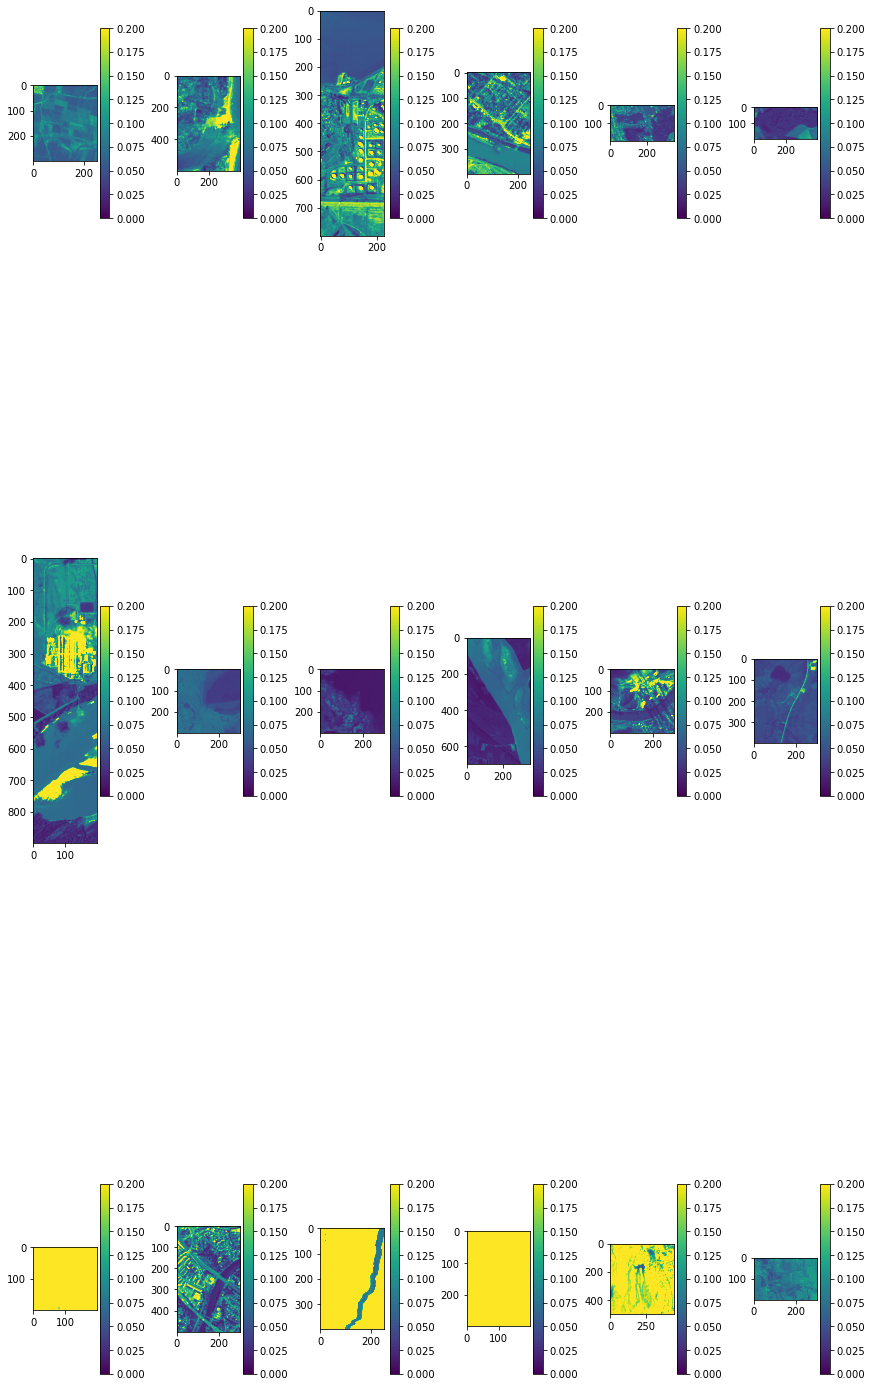

In [7]:
fig, axs = plt.subplots(nrows = 3, ncols = 6, figsize = (12,24), constrained_layout = True)
row = 0; col = 0
for i in range(len(cut_images)):
    if col == 6:
        row+=1
        col = 0
    im = axs[row,col].imshow(cut_images[i][:,:,50])
    plt.colorbar(im, ax = axs[row,col])
    im.set_clim(0,0.2)
    col+=1



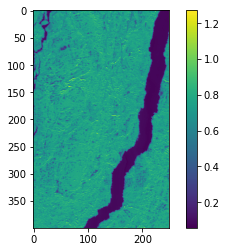

In [8]:
plt.imshow(Arctic_Ocean[:,:,50])
plt.colorbar()

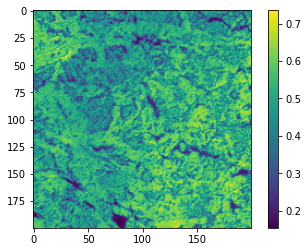

In [9]:
plt.imshow(Greenland_Coast[:,:,50])
plt.colorbar()

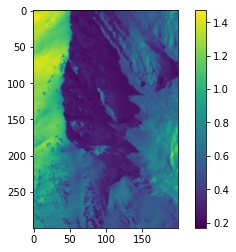

In [10]:
plt.imshow(Himalayas[:,:,50])
plt.colorbar()

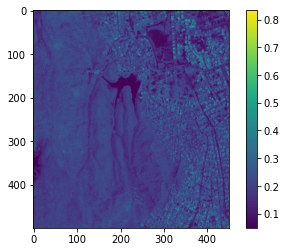

In [11]:
plt.imshow(Jodhpur_India[:,:,50])
plt.colorbar()

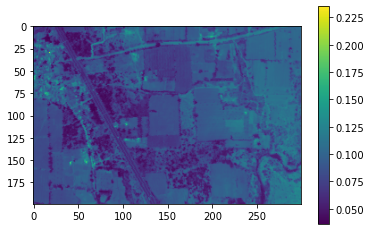

In [12]:
plt.imshow(Chandranagar_India[:,:,50])
plt.colorbar()

In [13]:
total_pixels = 0

for i in range(len(cut_images)):
    pixel_count = cut_images[i].shape[0]*cut_images[i].shape[1]
    total_pixels += pixel_count
    
print(total_pixels)

2195000


1. Kurnool, India:  (5618, 704, 425)
2. Pavicharam, India:  (5130, 680, 425)
3. SF Bay, US:  (3998, 670, 425)
4. Tulsa, OK:  (2446, 640, 425)
5. Munich, Germany:  (1673, 649, 425)
6. Holstein, Switzerland:  (1729, 658, 425)
7. MS River, US:  (2278, 651, 425)
8. Northern Alaska, US:  (1212, 637, 425)
9. Great Bear Lake Canada:  (1950, 648, 425)
10. McKenzie River, Canada:  (4016, 648, 425)
11. Charleston, West Virginia, WV:  (2344, 649, 425)
12. Saskatchewan, Canada:  (1636, 644, 425)
13. Greenland Coast:  (7441, 692, 425)
14. Neu Ulm, Germany:  (9035, 667, 425)
15. Arctic Ocean:  (8946, 946, 425)
16. Himalayas:  (2707, 989, 425)
17. Jodhpur, India:  (11670, 728, 425)
18. Chandranagar, India:  (5375, 780, 425)

In [14]:
cut_images_copy = cut_images.copy()

In [15]:
cut_images[i].shape

(200, 300, 425)

In [16]:
for i in range(len(cut_images)):
    cut_images[i] = cut_images[i].reshape((cut_images[i].shape[0] * cut_images[i].shape[1], cut_images[i].shape[2]))

In [17]:
for i in range(len(cut_images)):
    print(cut_images[i].shape)

(75000, 425)
(240000, 425)
(180000, 425)
(100000, 425)
(70000, 425)
(80000, 425)
(180000, 425)
(90000, 425)
(90000, 425)
(245000, 425)
(90000, 425)
(120000, 425)
(40000, 425)
(150000, 425)
(100000, 425)
(60000, 425)
(225000, 425)
(60000, 425)


In [18]:
for i in range(len(cut_images_copy)):
    print(cut_images_copy[i].shape)

(300, 250, 425)
(600, 400, 425)
(800, 225, 425)
(400, 250, 425)
(200, 350, 425)
(200, 400, 425)
(900, 200, 425)
(300, 300, 425)
(300, 300, 425)
(700, 350, 425)
(300, 300, 425)
(400, 300, 425)
(200, 200, 425)
(500, 300, 425)
(400, 250, 425)
(300, 200, 425)
(500, 450, 425)
(200, 300, 425)


In [19]:
Chandranagar_India.shape

(200, 300, 425)

In [20]:
#combined_images = np.concatenate((Kurnool_India, Pavicharam_India, SF_bay, Tulsa_OK, Munich_Ger, Holstein_Switz, MS_River, Northern_Alaska,\
                                 #Bear_Lake_Canada, McKenzie_River_Canada, Charleston_WV, Saskatchewan_Canada, Greenland_Coast, Neu_Ulm_Germany,\
                                 #Arctic_Ocean, Himalayas, Jodhpur_India, Chandranagar_India))
        
combined_images = np.concatenate((cut_images[0], cut_images[1], cut_images[2], cut_images[3], cut_images[4], cut_images[5], \
                                 cut_images[6], cut_images[7], cut_images[8], cut_images[9], cut_images[10], cut_images[11], \
                                 cut_images[12], cut_images[13], cut_images[14], cut_images[15], cut_images[16], cut_images[17]))        

In [32]:
combined_images.shape

(2195000, 425)

In [21]:
combined_images_425 = combined_images.copy()

In [22]:
bands = list(range(0,425))
bands = np.array(bands)
deeph2o = np.logical_or(np.logical_and(bands > 181, bands < 224), np.logical_and(bands > 275, bands < 329))
bad_cal = np.logical_or(bands > 418, bands < 3)
bad = np.logical_or(deeph2o, bad_cal)
combined_images[:, bad] = np.nan


In [23]:
use = np.all(np.isfinite(combined_images), axis = 0)
combined_images = combined_images[:, use]
print(combined_images.shape)

(2195000, 321)


In [44]:
combined_images_425.shape

(2195000, 425)

In [41]:
"""

start_time = time.time()
sum_sq_dist = []
seed = 8
k = range(3,19)
for i in k:
    kmeans = KMeans(init = 'k-means++', n_clusters = i, random_state = seed).fit(combined_images)
    sum_sq_dist.append(kmeans.inertia_)
    
print('-----%s seconds -----' % (time.time() - start_time))

"""

-----9218.78510260582 seconds -----


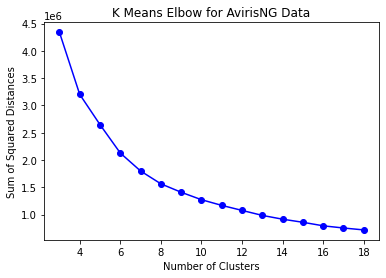

In [42]:
"""

plt.plot(k, sum_sq_dist, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('K Means Elbow for AvirisNG Data')
plt.show
plt.savefig('K-Means Elbow')

"""

In [66]:
#inertia = sum_sq_dist.copy()

In [45]:
# taking a little over 8 minutes
seed = 8
start_time = time.time()
kmeans_8 = KMeans(init = 'k-means++', n_clusters = 8, random_state = seed).fit(combined_images)
print('Execution Time: ', time.time() - start_time)

Execution Time:  463.16331124305725


In [46]:
kmeans_8

KMeans(random_state=8)

In [47]:
Z8 = kmeans_8.predict(combined_images)
clusterCount_8 = np.bincount(kmeans_8.labels_)
print(clusterCount_8)
means_8 = kmeans_8.cluster_centers_

[568528 309513  96485 220596 504178 412437  10377  72886]


In [93]:
means_8.shape

(8, 321)

In [48]:
np.savetxt('./Clustering_Info/Clustering_Means_321.txt', means_8)

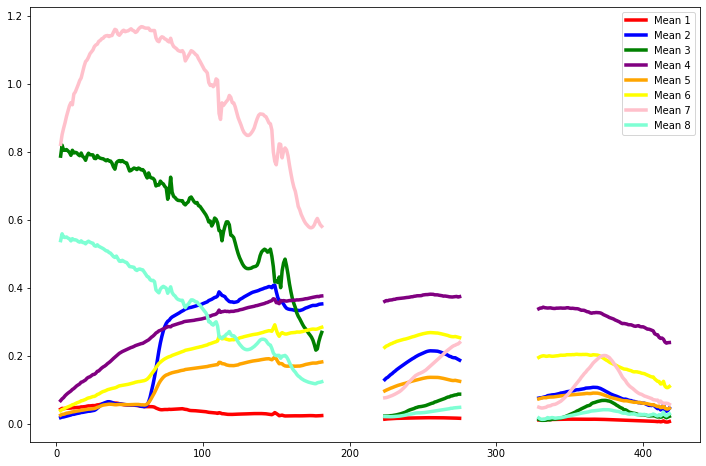

In [107]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'pink', 'aquamarine']
labels = ['Water', 'Vegetation', 'Snow + Ice', 'Soil', 'Dark Vegetation', 'Soil + Artificial Surfaces', 'Mountainous Snow', 'Ice + Sea Ice' ]

means_8_display = np.empty((means_8.shape[0], 425))
means_8_display[:] = np.nan

for i in range(means_8.shape[0]):
    means_8_display[i, 3:182] = means_8[i][0:179]
    means_8_display[i, 224:276] = means_8[i][179:231]
    means_8_display[i, 329:419] = means_8[i][231:321]
    
plt.figure(figsize = (12,8))
for i in range(means_8.shape[0]):
    plt.plot(means_8_display[i], label = 'Mean ' + str(i+1), color = colors[i], linewidth = 3.5)
plt.legend()
plt.savefig('Mean_Spectra_Plots')
np.savetxt('./Clustering_Info/Clustering_Means_425.txt', means_8_display)
    

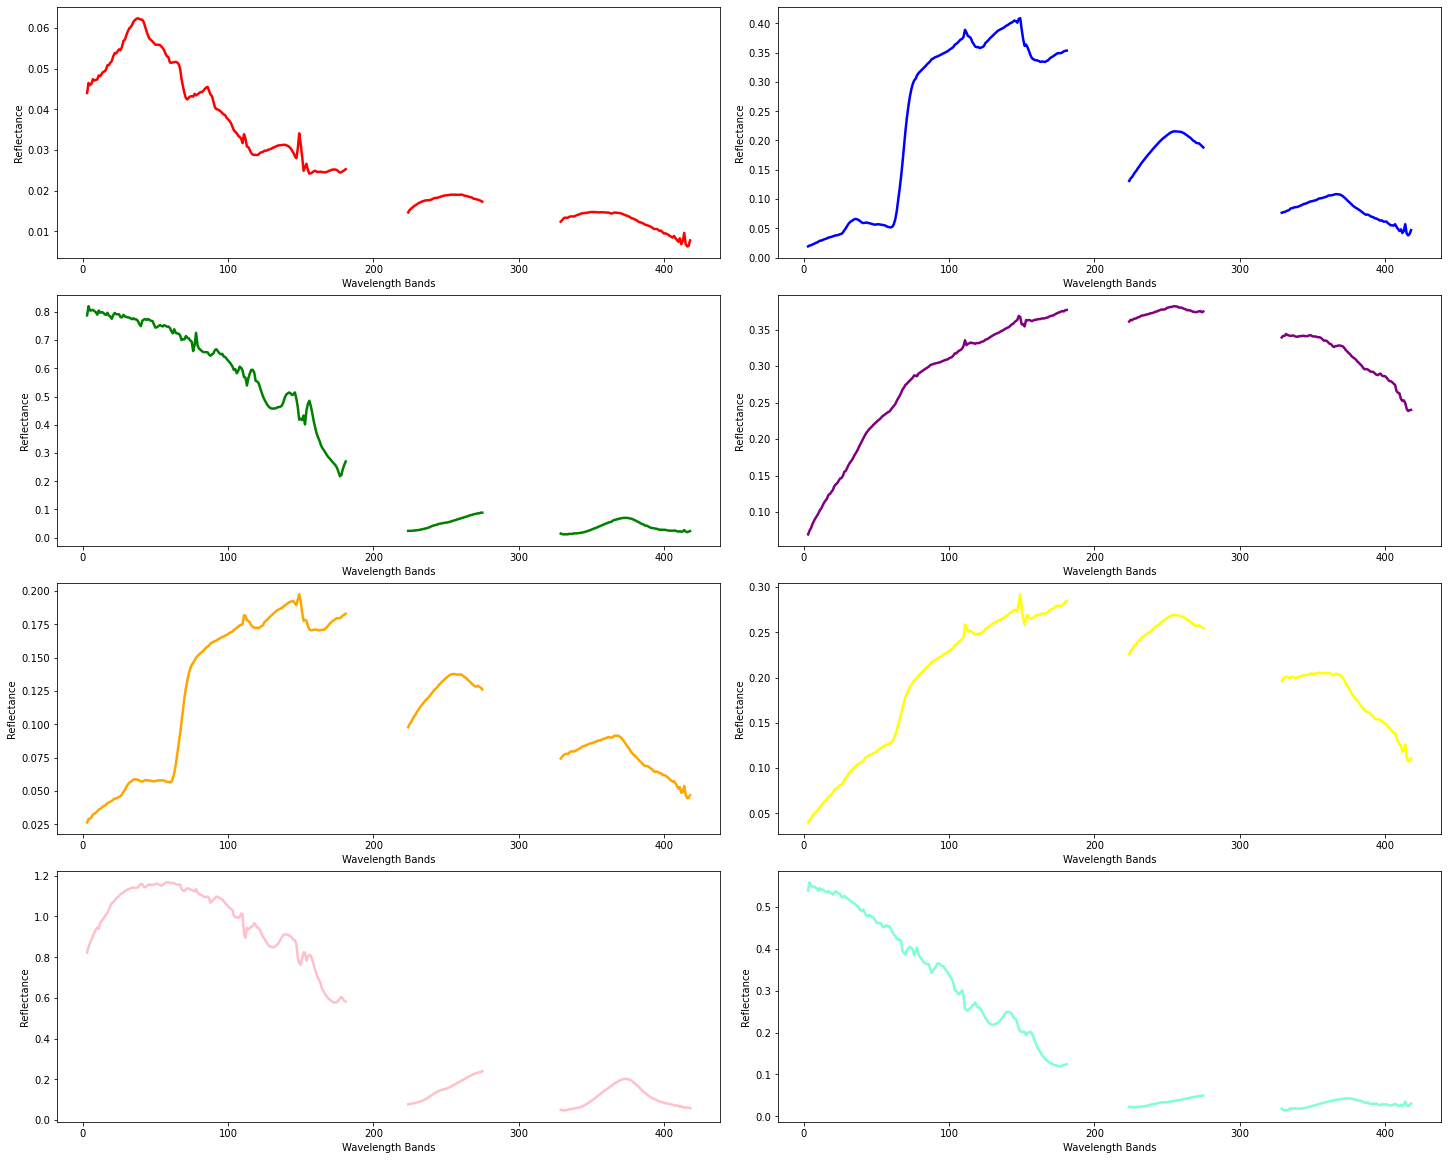

In [105]:
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (20,16), constrained_layout = True)
count = 0
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'pink', 'aquamarine']

for i in range(4):
    for j in range(2):
        axs[i, j].plot(means_8_display[count], color = colors[count], linewidth = 2.5)
        axs[i, j].set_xlabel('Wavelength Bands')
        axs[i, j].set_ylabel('Reflectance')
        count+= 1
        

[568528 309513  96485 220596 504178 412437  10377  72886]


In [ ]:
"""


spectra_list = [np.array([]), [], [], [], [], [], [], []]

for i in range(kmeans_8.shape[0]):
    label = kmeans_8.labels_[i]
    spectra_list[label-1].append(combined_images[i])
    
# should 

"""

In [49]:
kmeans_8.labels_.shape[0]

2195000

In [71]:
label = np.where(kmeans_8.labels_ == 7)

In [72]:
label[0].shape

(72886,)

In [81]:
clusterList = [np.where(kmeans_8.labels_ == i) for i in range(kmeans_8.n_clusters)]

In [90]:
clusterList[0][0].shape

(568528,)

In [91]:
cluster_1 = combined_images_425[clusterList[0][0]]
cluster_2 = combined_images_425[clusterList[1][0]]
cluster_3 = combined_images_425[clusterList[2][0]]
cluster_4 = combined_images_425[clusterList[3][0]]
cluster_5 = combined_images_425[clusterList[4][0]]
cluster_6 = combined_images_425[clusterList[5][0]]
cluster_7 = combined_images_425[clusterList[6][0]]
cluster_8 = combined_images_425[clusterList[7][0]]

In [92]:
print(cluster_1.shape)
print(cluster_2.shape)
print(cluster_3.shape)
print(cluster_4.shape)
print(cluster_5.shape)
print(cluster_6.shape)
print(cluster_7.shape)
print(cluster_8.shape)

(568528, 425)
(309513, 425)
(96485, 425)
(220596, 425)
(504178, 425)
(412437, 425)
(10377, 425)
(72886, 425)


In [35]:
np.savetxt('./Clustering_Info/Cl_1.txt', cluster_1)
np.savetxt('./Clustering_Info/Cl_2.txt', cluster_2)
np.savetxt('./Clustering_Info/Cl_3.txt', cluster_3)
np.savetxt('./Clustering_Info/Cl_4.txt', cluster_4)
np.savetxt('./Clustering_Info/Cl_5.txt', cluster_5)
np.savetxt('./Clustering_Info/Cl_6.txt', cluster_6)
np.savetxt('./Clustering_Info/Cl_7.txt', cluster_7)
np.savetxt('./Clustering_Info/Cl_8.txt', cluster_8)

[568528 309513  96485 220596 504178 412437  10377  72886]
